In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train[0]

6

In [8]:
def plot_sample(x_train, y_train, index):
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index]])

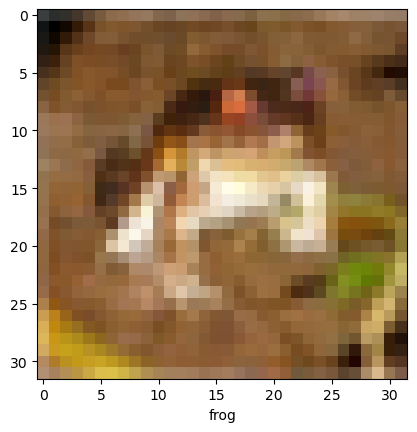

In [9]:
plot_sample(x_train, y_train, 0)

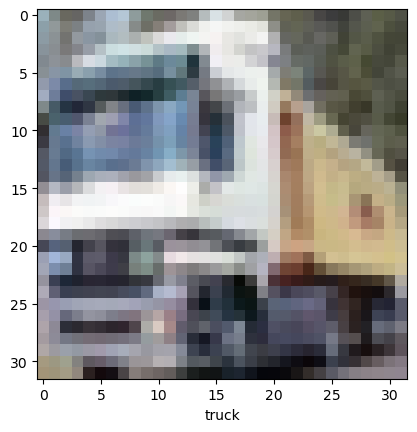

In [10]:
plot_sample(x_train, y_train, 1)

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/GPU:0'):
    ann.fit(x_train, y_train, epochs=5)

/Users/akshat/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3054 - loss: 1.9301
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4208 - loss: 1.6371
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4555 - loss: 1.5499
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4742 - loss: 1.4949
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4968 - loss: 1.4367


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.53      0.55      1000
           1       0.42      0.80      0.55      1000
           2       0.36      0.44      0.39      1000
           3       0.35      0.37      0.36      1000
           4       0.52      0.26      0.34      1000
           5       0.36      0.42      0.39      1000
           6       0.61      0.38      0.47      1000
           7       0.61      0.48      0.54      1000
           8       0.68      0.52      0.59      1000
           9       0.51      0.55      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [15]:
cnn = models.Sequential([
        
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/Users/akshat/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1993 - loss: 2.1602
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3910 - loss: 1.7009
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4655 - loss: 1.4860
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5087 - loss: 1.3768
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5338 - loss: 1.2991
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5655 - loss: 1.2243
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5853 - loss: 1.1742
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6048 - loss: 1.1222
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6281 - loss: 1.0753
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6383 - loss: 1.0462


In [17]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6015 - loss: 1.1416


[1.1561062335968018, 0.593999981880188]

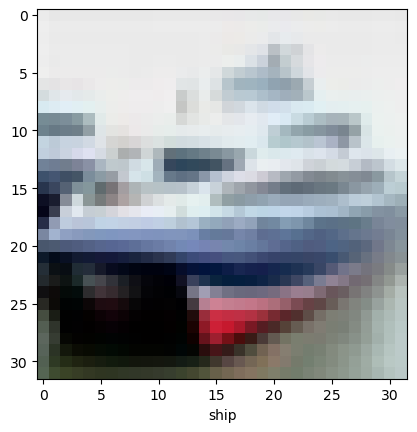

In [18]:
plot_sample(x_test, y_test,1)

In [19]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.83549701e-02, 9.93023068e-03, 1.00672014e-01, 3.11481804e-01,
        4.55038100e-02, 1.79001719e-01, 2.52720773e-01, 7.81892391e-04,
        3.89529131e-02, 2.59986357e-03],
       [5.57459928e-02, 1.59376025e-01, 2.22688890e-04, 1.45060094e-05,
        7.64096694e-06, 4.48092010e-07, 9.85220254e-07, 3.73992378e-07,
        7.81179488e-01, 3.45185865e-03],
       [3.97893712e-02, 1.49089098e-01, 2.54408619e-03, 1.75461103e-03,
        6.27662812e-04, 1.36780465e-04, 2.17889014e-04, 2.71563476e-04,
        7.69859970e-01, 3.57089676e-02],
       [7.29634285e-01, 5.76784760e-02, 4.53561805e-02, 3.14761768e-04,
        1.08164747e-03, 2.17321522e-05, 1.82285861e-04, 3.59651785e-05,
        1.62722543e-01, 2.97211623e-03],
       [6.81486737e-04, 3.50422482e-03, 5.27670048e-02, 5.93695901e-02,
        4.27598149e-01, 1.48217557e-02, 4.37897414e-01, 4.43571596e-04,
        2.69038114e-03, 2.26442091e-04]], dtype=float32)

In [20]:
np.argmax(y_pred[1])

8

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.73      0.67      1000
           1       0.49      0.92      0.64      1000
           2       0.48      0.48      0.48      1000
           3       0.51      0.33      0.40      1000
           4       0.61      0.47      0.53      1000
           5       0.61      0.42      0.50      1000
           6       0.57      0.81      0.67      1000
           7       0.75      0.60      0.66      1000
           8       0.74      0.74      0.74      1000
           9       0.70      0.44      0.54      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.58     10000
weighted avg       0.61      0.59      0.58     10000

